## Business Questions
1. Which customer segments contribute most to revenue and profit?
2. Which product categories and sub-categories drive sales?
3. How do discounts impact profit and repeat purchases?
4. Who are the high-value vs churn-risk customers?
5. What actionable strategies can improve revenue and retention?


In [5]:
import os
os.getcwd()


'c:\\Users\\ABHILIPSA PATI\\OneDrive\\Desktop\\Whole\\Data Analysis projects\\Advanced Retail Analytics & Customer Intelligence\\notebooks'

In [7]:
os.listdir()


['retail_analysis.ipynb']

In [10]:
os.listdir("..")



['data', 'notebooks']

In [12]:
os.listdir("../data")


['retail_sales.csv']

In [15]:
import pandas as pd

df = pd.read_csv("../data/retail_sales.csv", encoding="latin1")
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [23]:
df.head()
df.info()
df.describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)


In [25]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [26]:
# Fill missing Postal Codes with 'Unknown'
df['Postal Code'] = df['Postal Code'].fillna('Unknown')


In [27]:
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days


In [28]:
df.to_csv("../data/clean_superstore.csv", index=False)


“Which product categories & sub-categories drive sales?”

In [32]:
# Sales by Category
category_sales = (
    df.groupby('Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)

category_sales


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

C:\Users\ABHILIPSA PATI\AppData\Local\Temp\ipykernel_12188\1115388661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


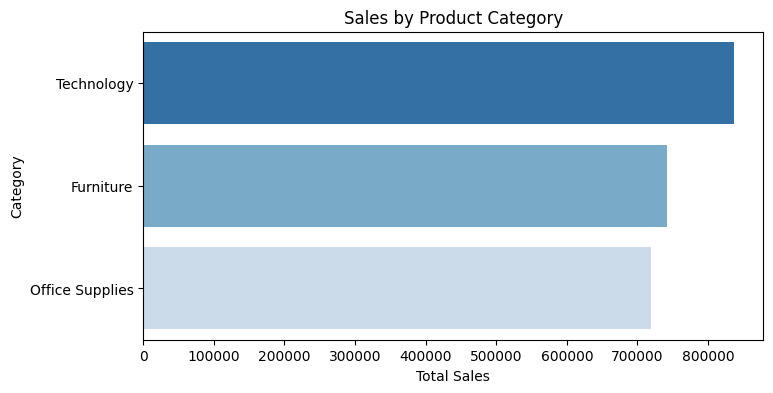

In [34]:
##Visualisation
plt.figure(figsize=(8,4))
sns.barplot(
    x=category_sales.values,
    y=category_sales.index,
    palette="Blues_r"
)
plt.title("Sales by Product Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()


In [35]:
#Sub-Category Analysis 
subcat_sales = (
    df.groupby('Sub-Category')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

subcat_sales

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

C:\Users\ABHILIPSA PATI\AppData\Local\Temp\ipykernel_12188\1416313358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


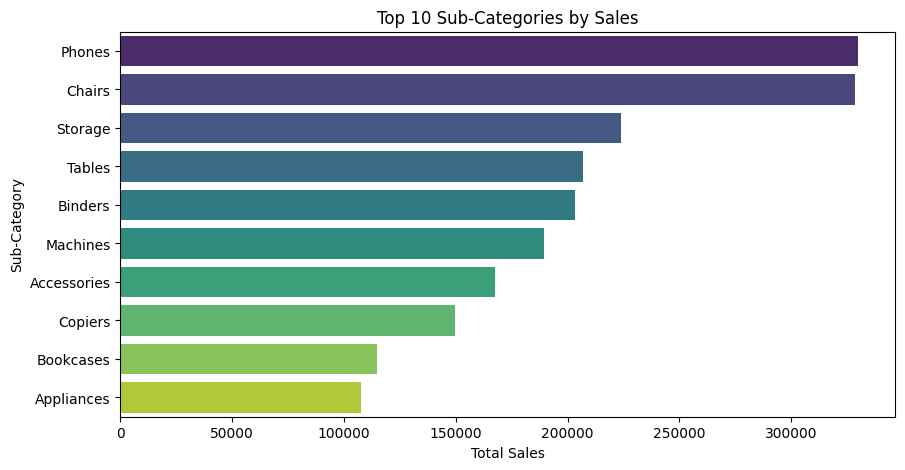

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=subcat_sales.values,
    y=subcat_sales.index,
    palette="viridis"
)
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.show()


### Insight:
- Technology and Furniture contribute the highest revenue.
- Sub-categories like Phones and Chairs dominate total sales.
- These categories should be prioritized for promotions and inventory planning.


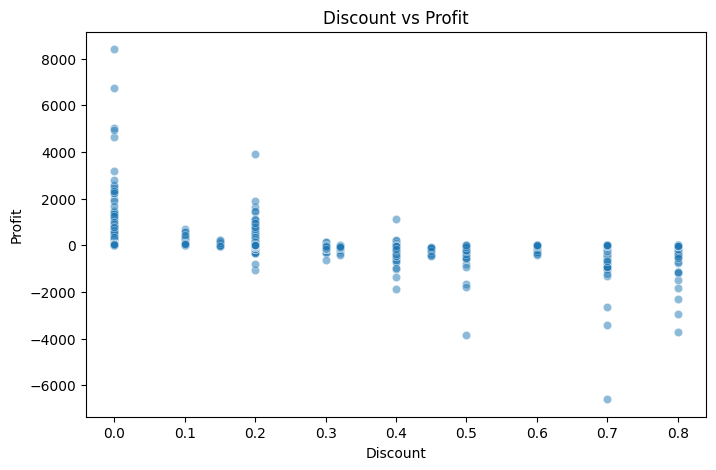

In [37]:
# Relationship between Discount & Profit
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='Discount',
    y='Profit',
    alpha=0.5
)
plt.title("Discount vs Profit")
plt.show()


In [38]:
#Profit by Discount Level
discount_profit = (
    df.groupby('Discount')['Profit']
    .mean()
)

discount_profit


Discount
0.00     66.900292
0.10     96.055074
0.15     27.288298
0.20     24.702572
0.30    -45.679636
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -101.796797
Name: Profit, dtype: float64

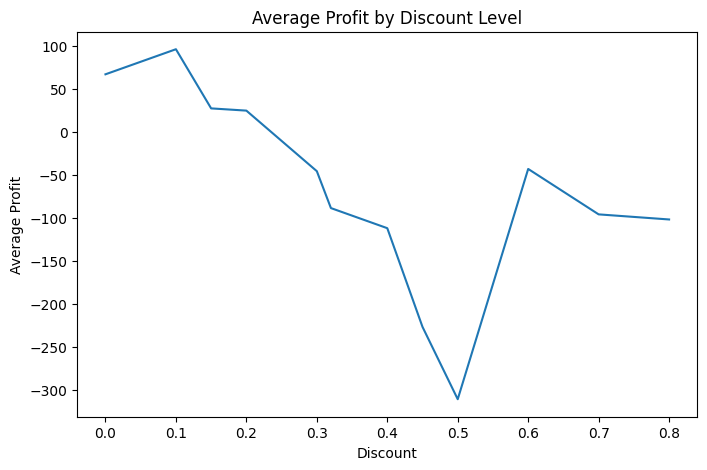

In [40]:
#Visualization
plt.figure(figsize=(8,5))
sns.lineplot(
    x=discount_profit.index,
    y=discount_profit.values
)
plt.title("Average Profit by Discount Level")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.show()


### Insight:
Higher discount levels are associated with declining profitability, indicating aggressive discounting negatively impacts margins.


In [41]:
#CUSTOMER VALUE & CHURN RISK ANALYSIS
customer_df = (
    df.groupby('Customer ID')
    .agg({
        'Sales': 'sum',
        'Order ID': 'nunique',
        'Profit': 'sum'
    })
    .rename(columns={'Order ID': 'Order_Count'})
)


In [42]:
# Identify High-Value vs Low-Value Customers
customer_df['Customer_Type'] = pd.qcut(
    customer_df['Sales'],
    q=3,
    labels=['Low Value', 'Medium Value', 'High Value']
)


In [43]:
# Compare Profitability
customer_df.groupby('Customer_Type')['Profit'].mean()


C:\Users\ABHILIPSA PATI\AppData\Local\Temp\ipykernel_12188\604771512.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_df.groupby('Customer_Type')['Profit'].mean()


Customer_Type
Low Value        71.663563
Medium Value    237.208697
High Value      773.661472
Name: Profit, dtype: float64

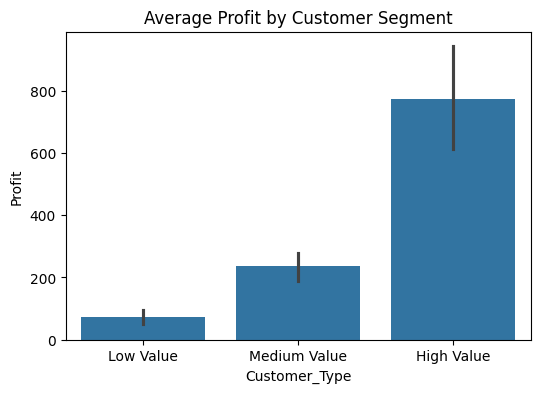

In [44]:
# Visualization
plt.figure(figsize=(6,4))
sns.barplot(
    data=customer_df.reset_index(),
    x='Customer_Type',
    y='Profit'
)
plt.title("Average Profit by Customer Segment")
plt.show()


### Insight:
High-value customers generate significantly higher average profit compared to medium and low-value customers. 
This indicates that targeted retention and upselling strategies focused on high-value customers can substantially improve overall profitability.


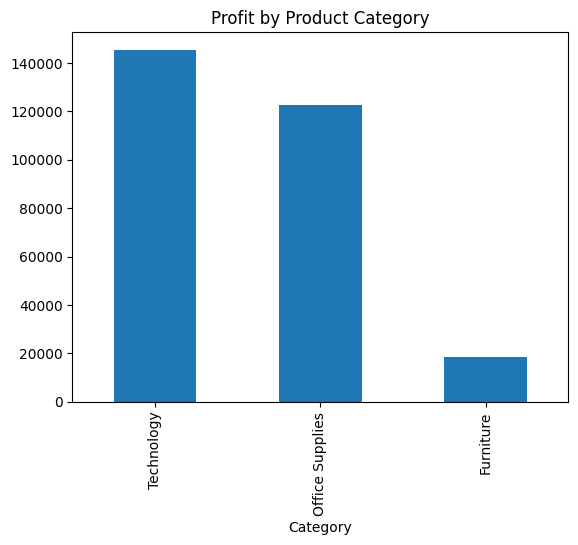

In [47]:
#Category Profitability
cat_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
cat_profit.plot(kind='bar')
plt.title("Profit by Product Category")
plt.show()


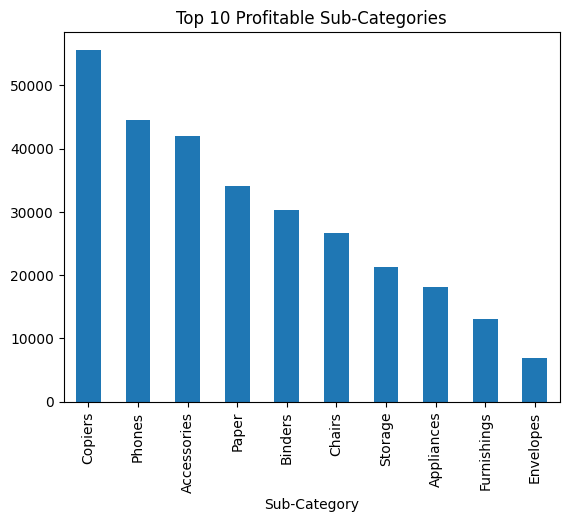

In [48]:
#Sub-Category Profitability
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
subcat_profit.plot(kind='bar')
plt.title("Top 10 Profitable Sub-Categories")
plt.show()


### Key Insights
- High-value customers generate significantly higher average profit.
- Technology and Office Supplies are the most profitable categories.
- Heavy discounting often correlates with reduced profit.
- Business should prioritize retention of high-value customers and optimize discount strategies.
